## Jupyter Data Science Workflow

#### From exploratory analysis to reproducible science

Wayne Nixalo

-- Following along from Jake VanderPlas: [YouTube](https://www.youtube.com/watch?v=_ZEWDGpM-vM&index=1&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [5]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


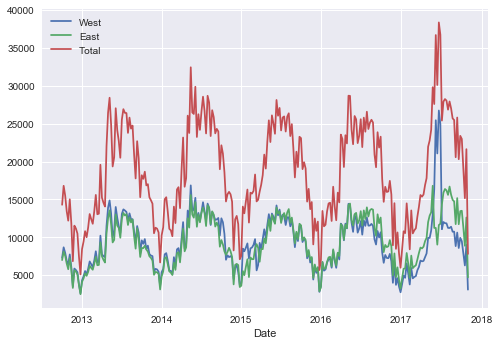

In [6]:
data.resample('W').sum().plot()

---

To see if there are any annual trends among ridership is to do a rolling window:

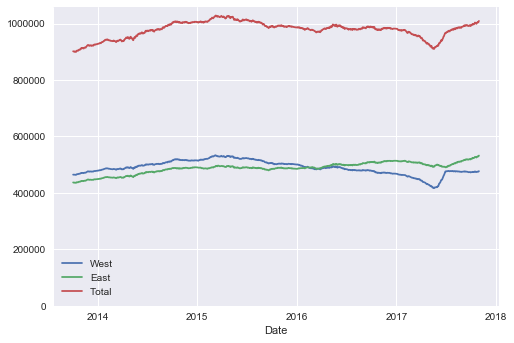

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

To look at the trend within individual days:

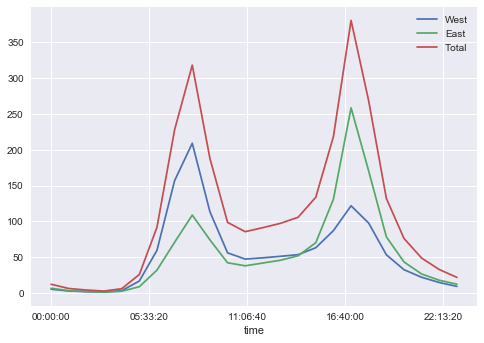

In [8]:
data.groupby(data.index.time).mean().plot(); # group by time of day & plot average

You can see that the West-bound side peaks in the morning and the East-bound side peaks in the afternoon - indicative of a commute pattern. Into the city via West in the morning and out of the city via East in the afternoon.

It'd be nice to see the whole dataset in this way. One way to do that is with a pivot table:

In [9]:
# pivoted dataset
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5] # looking at first 5x5 block of this table

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


A pivoted dataset where each column is a day and each column is an hour of that day

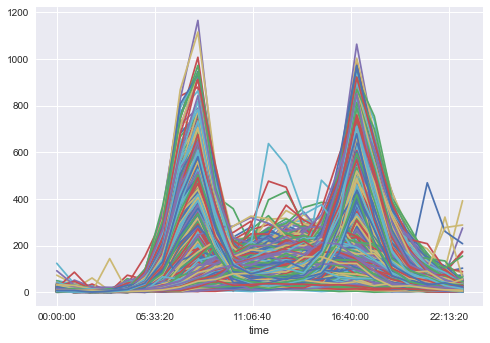

In [10]:
pivoted.plot(legend=False);

This is a bit hard to see, so we can specify the alpha (transparency) channel to plot transparent lines atop oneanother to get an idea of how the trend in crossings over a day changes in our 4 year period:

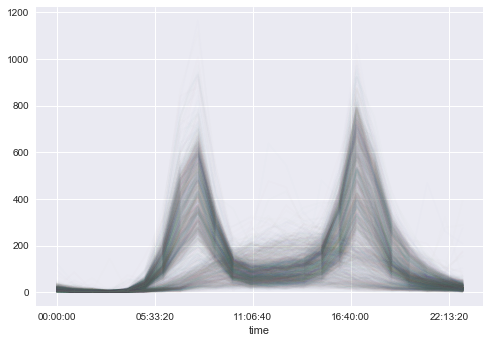

In [11]:
pivoted.plot(legend=False, alpha=0.01);

You can see that there are days with a more even distribution of commuters than the two peaks, suggesting weekends and holidays, whereas the peaks hint at working weekdays.

In [14]:
get_fremont_data??